# Introduction
---

# Import libries

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import io, transform

# Load the data
---
이번에는 이미지를 불러와야 합니다. 다른 종류의 데이터를 다루는 것과 크게 다른 점은 없습니다만 이미지와 관련된 라이브러리를 사용한 경험이 없어 막막할 수도 있겠습니다. sci-kit image를 사용하면 간단하게 처리할 수 있습니다. 먼저, 첫 번째 이미지를 불러와보겠습니다.

In [16]:
io.imread('./data/train/cat.0.jpg')

array([[[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [240, 201, 122],
        [239, 200, 121],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [241, 202, 123],
        [240, 201, 122],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [241, 202, 123],
        [240, 201, 122],
        [239, 200, 121]],

       ...,

       [[153, 122,  55],
        [153, 122,  55],
        [153, 122,  55],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[152, 121,  54],
        [152, 121,  54],
        [152, 121,  54],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[151, 120,  53],
        [151, 120,  53],
        [151, 120,  53],
        ...,
        [  1,   1,   0],
        [  1,   1,   0],
        [  1,   1,   0]]

skimage.io.imread()를 사용하면 수치 데이터로 표현된 이미지의 모습(?)을 확인할 수 있습니다. 해당 이미지를 보고 싶다면 matplotlib와 같은 시각화 라이브러리를 사용합니다(~~왠지 모르게 긴급한 상황에 처한 것 같은 고양이의 모습을 확인할 수 있습니다~~). 더 자세한 설명은 [여기](https://matplotlib.org/users/image_tutorial.html)를 참고하시길 바랍니다.

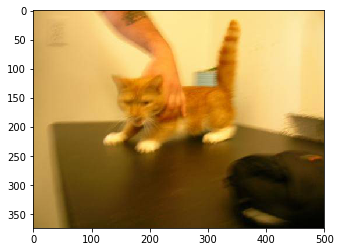

In [17]:
plt.imshow(io.imread('./data/train/cat.0.jpg'))

# Build the model
---
이번에는 2개의 컨볼루션층과 1개의 완전연결층으로 구성된 모델을 만들어보도록 하겠습니다.

In [ ]:
class CNN(nn.Module):
    def __init__(self, n_classes=2):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=0),  
                                   nn.ReLU(), 
                                   nn.BatchNorm2d(32), 
                                   nn.MaxPool2d(2, stride=2)
                                  )
        self.conv2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0), 
                                   nn.BatchNorm2d(64),
                                   nn.ReLU(), 
                                   nn.MaxPool2d(2, stride=2)
                                  )
        self.fc = nn.Sequential(nn.Linear(reshape, 128), nn.ReLU(), nn.Linear(128, n_classes), nn.Softmax())
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = out.reshape(out.size(0), -1) # 완전연결층에 맞게 펼쳐주는 역할
        out = self.fc(out)

각각에 대해 설명하도록 하겠습니다.
## Convolutional Layer
---
## ReLU Activation
---
ReLU(Rectified Linear Unit)는 아래 그림과 같은 형태의 활성함수입니다. 양의 영역이 선형이기 때문에 포화현상이 발생하지 않으며, 음의 영역은 모두 0이 되므로 신경망이 희소해지게 됩니다.

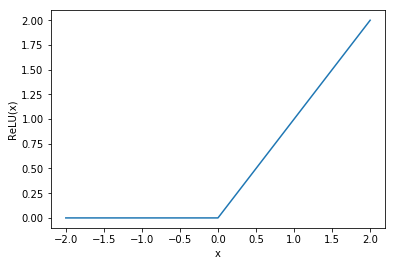

In [29]:
x = range(-2,3)
y = nn.functional.relu(torch.tensor(x)).tolist()
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.show()

## Batch Normalization
---
인공신경망이 깊어짐에 따라 학습이 힘들어지는 이유 중 하나는 학습이 진행됨에 따라 가중치가 갱신되기 때문에 각각 층의 입력값 분포가 변화하기 때문입니다. 첫 번째 층에는 트레이닝 데이터가 아무런 변환도 없이 그대로 입력됩니다. 그런데 두 번째 층부터는 학습이 진행되면서 갱신되는 가중치에 의해 변형된 트레이닝 데이터가 전달되게 되죠. 이처럼 학습 도중에 샘플의 분포가 바뀌는 현상을 covariate shift라고 합니다. 층이 깊어질수록 원래의 트레이닝 데이터가 더욱 변형되므로, covariate shitf 현상이 심해집니다.

## AlexNet
---
$AlexNet$은 5개의 컨볼루션층(convolution layer)와 분류를 위한 3개의 완전연결층(fully connected layer)로 이루어져 있습니다. 입력으로는 $ImageNet$의 데이터(3\*244\*244의 RGB 채널 이미지)를 사용했고, 첫 번째 컨볼루션층에서 3\*11\*11 필터 96개를 사용했습니다.

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, n_classes=2):
        super(AlexNet, self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), 
                                    nn.BatchNorm2d(96), 
                                    nn.ReLU(), 
                                    nn.MaxPool2d(3, stride=2)
                                  )
        self.conv2 = nn.Sequential(nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=1), 
                                    nn.BatchNorm2d(256), 
                                    nn.ReLU(), 
                                    nn.MaxPool2d(3, stride=2)
                                  )
        self.conv3 = nn.Sequential(nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1), 
                                    nn.ReLU()
                                  )
        self.conv4 = nn.Sequential(nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1), 
                                   nn.ReLU()
                                  )
        self.conv5 = nn.Sequential(nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1), 
                                   nn.ReLU()
                                  )
        self.fc1 = nn.Sequential(nn.Linear(4096, 4096), nn.ReLU())
        self.fc2 = nn.Sequential(nn.Linear(4096, 4096), nn.ReLU())
        self.fc3 = nn.Sequential(nn.Linear(4096, n_classes), nn.Softmax())
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.conv5(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

##  VGGNet
---
$VGGNet$을 한 마디로 요약하면 '더 작은 필터, 더 깊은 층'이 되겠습니다. 3\*3 필터를 사용해 더 깊은 신경망을 구성했고, 13개의 컨볼루션층과 3개의 완전연결층을 사용했습니다($VGG-16$의 경우).

In [ ]:
class VGG16(nn.Module):
    def __init__(self, n_classes=2):
        super(VGG16, self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1), 
                                   nn.ReLU(), 
                                   nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1), 
                                   nn.ReLU(), 
                                   nn.MaxPool2d(2, stride=2)
                                  )
        self.conv2 = nn.Sequential(nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1), 
                                   nn.ReLU(), 
                                   nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1), 
                                   nn.ReLU(), 
                                   nn.MaxPool2d(2, stride=2)
                                  )
        self.conv3 = nn.Sequential(nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1), 
                                   nn.ReLU(), 
                                   nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1), 
                                   nn.ReLU(), 
                                   nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1), 
                                   nn.MaxPool2d(2, stride=2)
                                  )
        self.conv4 = nn.Sequential(nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1), 
                                   nn.ReLU(), 
                                   nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1), 
                                   nn.ReLU(), 
                                   nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1), 
                                   nn.ReLU(), 
                                   nn.MaxPool2d(2, stride=2)
                                  )
        self.conv5 = nn.Sequential(nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1), 
                                   nn.ReLU(), 
                                   nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1), 
                                   nn.ReLU(), 
                                   nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1), 
                                   nn.ReLU(), 
                                   nn.MaxPool2d(2, stride=2)
                                  )
        self.fc = nn.Sequential(nn.Linear(4096, 4096), 
                                nn.ReLU(), 
                                nn.Linear(4096, 4096), 
                                nn.ReLU(), 
                                nn.Linear(4096, n_classes), 
                                nn.Softmax())
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.conv5(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        
        return out

## GoogLeNet
---
$Network In Network$($NIN$)에서 영감을 얻은 $Inception module$을 사용했습니다. 기존 컨볼루션 연산이 필터와 입력값의 선형조합으로 이루어진 반면 $NIN$에서는 MLP가 들어갑니다.

In [ ]:
class GoogLeNet(nn.Module):
    def __init__(self, n_classes=2):
        super(GoogLeNet, self).__init__()